# Data Visualization and Pandas

![Image of Yaktocat](https://github.com/AnastasisKratsios/Python_Basics/blob/main/Supporting_Documents/matplotlib_and_seaborn.png?raw=true)

---

In this lesson, we'll learn how to plot and visualize data.  These skills are integral to communicating your findings, hypotheses, and ideas.  

It is at this point where we'll discuss pandas since it "plays well" with our data-visualization packages.

---

Let's load some previously used packages.

In [129]:
import numpy as np
import pandas as pd

This workbook introduced `Matplotlib`, a cornerstone of Python's data visualization domain.  Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. 

In [130]:
import matplotlib.pyplot as plt

To make our plots as aesthetically pleasing as possible, we will rely on the `Seaborn` package.  Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

It's specifically designed to create attractive and informative statistical graphics. Seaborn simplifies the process of creating various types of visualizations for exploring and understanding data by providing a high-level interface and a set of functions that are particularly well-suited for working with structured data.

In [131]:
import seaborn as sns

# Set Colour Theme
sns.set_theme(style="darkgrid")

# Plot A Function's Graph

First let's generate some artificial data

In [132]:
# Let's generate some data

## Our X's (inputs)
x = np.linspace(0, -10, 10)

## Initialize our hyperparameter
t_param = 1

## Out function on R
def f_x_scalar(x,t=t_param):
    y_x = np.exp(-x**t)
    return y_x

## Let's vectorize our function
f_x = np.vectorize(f_x_scalar)

## Get Data
y = f_x(x) 

Next, let's generate the plot.

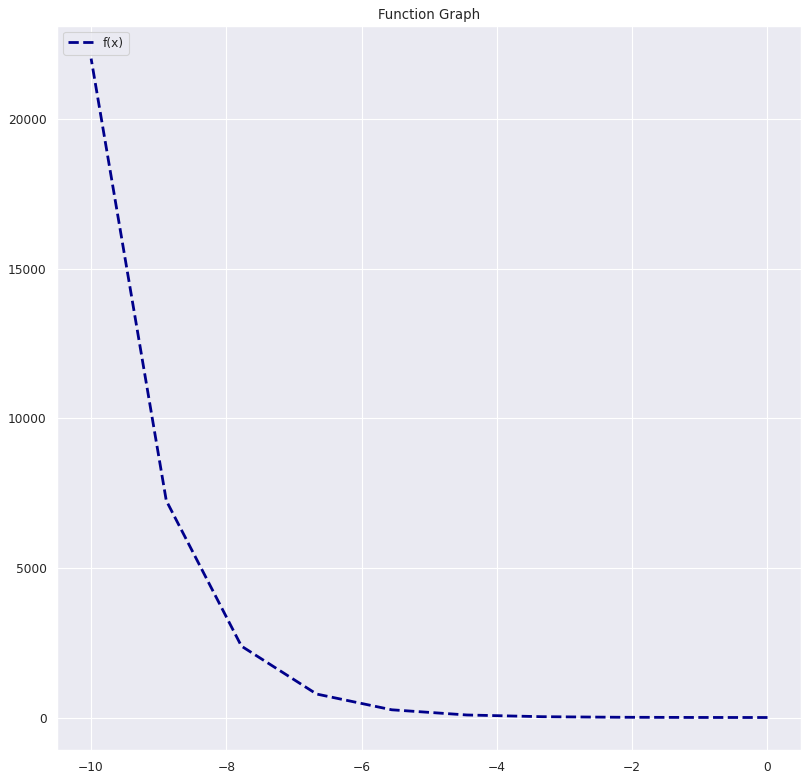

In [221]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k') # Figure Dimensions

# Generate Plots #
#----------------#
plt.plot(x, # Inputs/Domain
         y, # Output/Codomain
         color='darkblue', # Colour of line
         label='f(x)', # Label
         linewidth=2.5, # line thickness
         linestyle='--') # Style of line

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Function Graph")

# Show plot
plt.show()

## Saving Images

That plot was very pretty, so ofcourse we'd like to keep it.  

Let's see how to make that happen efficienctly and automatically.

### Automatic Directory Creation

This package will help us check and create directories on our machine.

In [134]:
from pathlib import Path

Lets create a subdirectory, within our working directory, called `Plots/Lesson_3/` if and only if it does not already exists.  The following code snippet automates this for us.

**Note:** *The period (.) in the following snippet means "input current directory".*

**Note:** This next code was written on my Linux machine, so if you're running a different operating system, e.g. Windows, you'll likely have to change the directions of the /s.

In [135]:
Path('./Plots/Lesson_3/').mkdir(parents=True, exist_ok=True)

Let's re-run the above code so that the generate figure is automatically saved.  

I'll make the `plt.show()` optional, using a global **variable** called `generate_plots` in my code.  If this parameter exists in the memory, then the plot will be displayed, else it will not.  

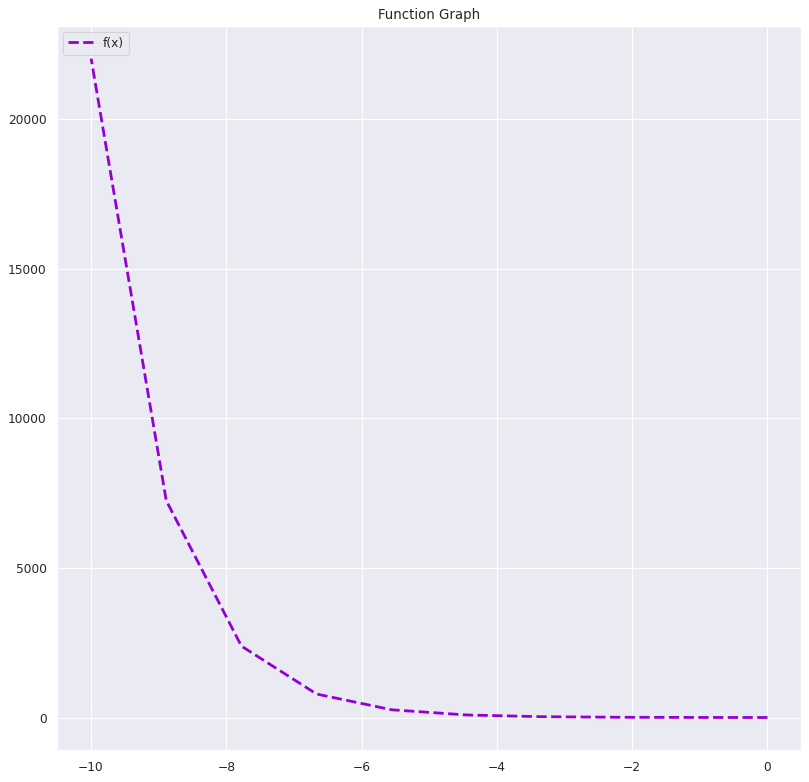

In [136]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k') # Figure Dimensions

# Generate Plots #
#----------------#
plt.plot(x, # Inputs/Domain
         y, # Output/Codomain
         color='darkviolet', # Colour of line
         label='f(x)', # Label
         linewidth=2.5, # line thickness
         linestyle='--') # Style of line

# Format Plot #
#-------------#
plt.legend(loc="upper left") # Where to place legend
plt.title("Function Graph") # Plot Name

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./Plots/Lesson_3/Autosavedplot_example.pdf', format='pdf')
# Show Plot
if 'generate_plots' in globals():
    plt.show(block=False)

## Visualizing Distributions

Next, let's visualize some distributions and practice our sampling. 

First we fix our global variable defining the number of samples to be generated.

In [137]:
# Number of Samples
N_samples = 10**2

Next we randomly generate samples, don't forget to fix a seed.

In [138]:
# Set Seeds
import random
np.random.seed(2023)
random.seed(2023)

# Generate Samples
samples = np.random.normal(0,1,N_samples)

If youre like me, then python *warnings*, which are by no means *errors* just notifications, drive you mad.  Feel free to supress them using this code snippet.

In [139]:
import warnings
warnings.filterwarnings("ignore")

I'll autosave the file with the number of samples autoamtically put into the file name using the `str()` command.  
Without further ado, our plot:

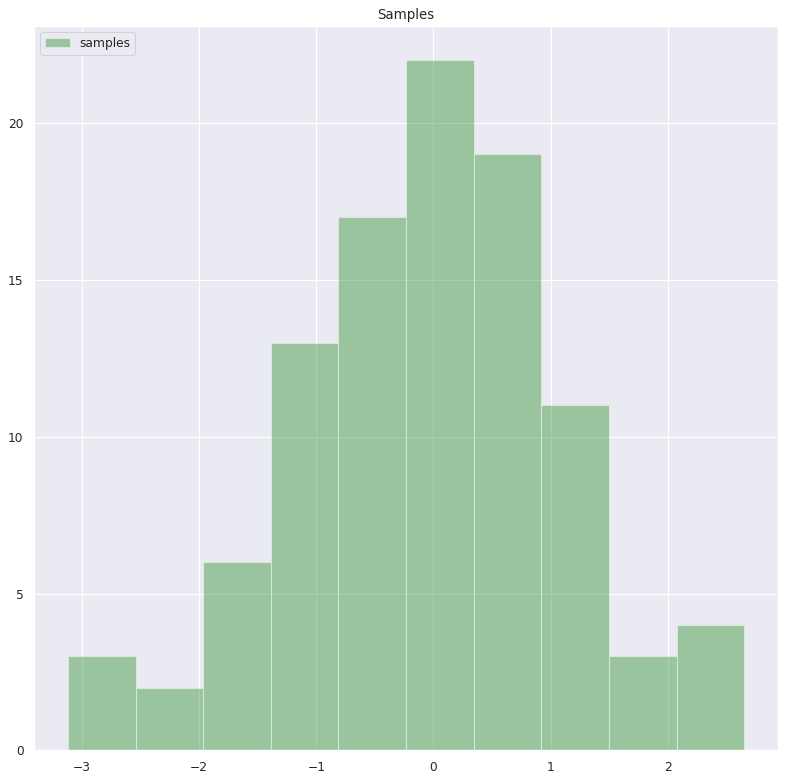

In [140]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k') # Figure Dimensions

# Generate Plots #
#----------------#
sns.distplot(samples, # Generate Samples
             color='forestgreen', 
             kde=False, # No kernel density estimator line
             label='samples')

# Format Plot #
#-------------#
plt.legend(loc="upper left") # Where to place legend
plt.title("Samples") # Plot Name

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./Plots/Lesson_3/Random_Samples__NoSamplesAre'+str(N_samples)+'.pdf', format='pdf')
# Show Plot
if 'generate_plots' in globals():
    plt.show(block=False)

We can have more than one histogram on the same plot.  Here's an example with the second histogram having more samples and we will transform the data using the map
$$
x\mapsto \cos(x)+1.  
$$
Moreover, the `Seaborn` packages gives us the functionality to automatically estimat our distogram with a continuous distribution, so-called [kernel density estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation).

We will use: 10000 samples this time!


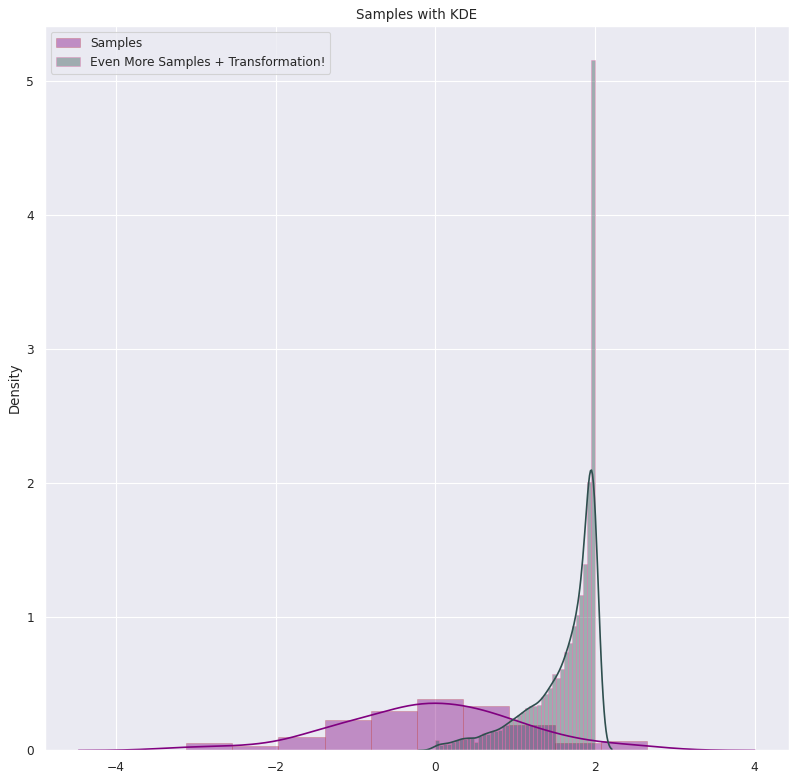

In [141]:
#----------------------------#
### Write Custom Function ####
#----------------------------#

def data_transformer__scalar(x):
    transformed_x = np.cos(x) + 1
    return transformed_x

data_transformer = np.vectorize(data_transformer__scalar)


#----------------------------#
##### Generate Samples  ######
#----------------------------#
N_samples__more = N_samples**2
print('We will use: '+str(N_samples__more)+' samples this time!')

## Generate Samples From Standard Normal
samples__more = np.random.normal(0,1,N_samples__more)

## Transform Samples
samples__more = data_transformer(samples__more)

#NOTE!: We can use the same name for a variable to REDEFINE it!  Just as we did above :)



#-----------------------#
###### Plot again  ######
#-----------------------#




# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k') # Figure Dimensions


# Generate Plots #
#----------------#
# First Histogram
sns.distplot(samples, # Generate Samples
             color='purple', 
             kde=True, 
             hist_kws=dict(edgecolor="r", linewidth=.675),
             label='Samples')

# Second Histogram
sns.distplot(samples__more, # Generate Samples
             color='darkslategrey', 
             kde=True, 
             hist_kws=dict(edgecolor='hotpink', linewidth=.675),
             label='Even More Samples + Transformation!')

# Format Plot #
#-------------#
plt.legend(loc="upper left") # Where to place legend
plt.title("Samples with KDE") # Plot Name

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./Plots/Lesson_3/Random_Samples__NoSamplesAre'+str(N_samples)+'_with_more_samples_drawn.pdf', format='pdf')
# Show Plot
if 'generate_plots' in globals():
    plt.show(block=False)

# Pandas

Pandas is a Python library for data manipulation and analysis. It excels at handling structured data through its DataFrame and Series structures. Pandas enables data cleaning, transformation, merging, and exploration, fostering efficient data-driven decision-making. It's a pivotal asset for researchers, analysts, and data scientists, streamlining data workflows and insights extraction.

In short, the main differences between `Pandas` and `NumPy` are:

**Pandas:** *Focuses on data manipulation with tabular structures (the DataFrame object type), optimized for handling labeled data and missing values.*

**NumPy:** *Concentrates on numerical operations with arrays (object type), suited for mathematical computations and operations on homogeneous data.*

In particular, Pandas is convenient for data visualization.  Let's see an example.

In [146]:
# Generate Synthetic Data in Numpy
A_synthetic_data = np.random.normal(0,1,[2,3])
# Take a peek
print(A_synthetic_data)

# Convert to Pandas Dataframe type
A_synthetic_data__pd = pd.DataFrame(A_synthetic_data, # 2D NumPy array to be converted
                                    columns = ['Column_A','Column_B','Column_C']) # Name of Pandas columns
# Display Pandas Dataframe
print('Pandas Version:')
A_synthetic_data__pd

[[ 0.32018962 -0.94526553 -0.61735282]
 [ 0.4204837   1.0003915  -2.22568787]]
Pandas Version:


,Column_A,Column_B,Column_C
0,0.320190,-0.945266,-0.617353
1,0.420484,1.000391,-2.225688


Let's see a more interesting example.  
In this case, we'll scrape some data from [Yahoofinance](https://ca.finance.yahoo.com/) and then automatically convert it to a Pandas DataFrame.  
We'll consider the closing prices of Apple and Google stocks using [their tickers](https://www.investopedia.com/ask/answers/12/what-is-a-stock-ticker.asp).  We get data for the last month.

We will start by initializing an empty DataFrame

In [180]:
DF_Stock = pd.DataFrame()

We then specify which tickers we are interested in getting data for.

In [206]:
tickers = ["AAPL", "GOOG","MSFT"]

We then iteratively build our dataframe, getting data for each ticker one at a time.  Then, we append the closing prices to our dataframe; effectively populating it.

In [207]:
for i in range(len(tickers)):
    
    # Read correct list entry
    ticker = tickers[i]
    # Convert to yf ticker object
    ticker = yf.Ticker(ticker)

    # Retrieve Historical Stock data
    hist_ticker = ticker.history(period="1mo")
    # Extract "Closing Price" Column, called 'Close'
    hist__closing_price_ticker = hist_ticker[['Close']]
    
    # UPDATE STEP
    if i == 0:
        DF_Stock = hist__closing_price_ticker
    else:
        # Append New data to our data frame
        DF_Stock = pd.concat([DF_Stock, hist__closing_price_ticker], axis=1)
        
# Renaming Columns to Ticker Names
DF_Stock.columns = tickers

### Plotting the Pandas DataFrame

Let's wrap up by plotting our time-series as before.

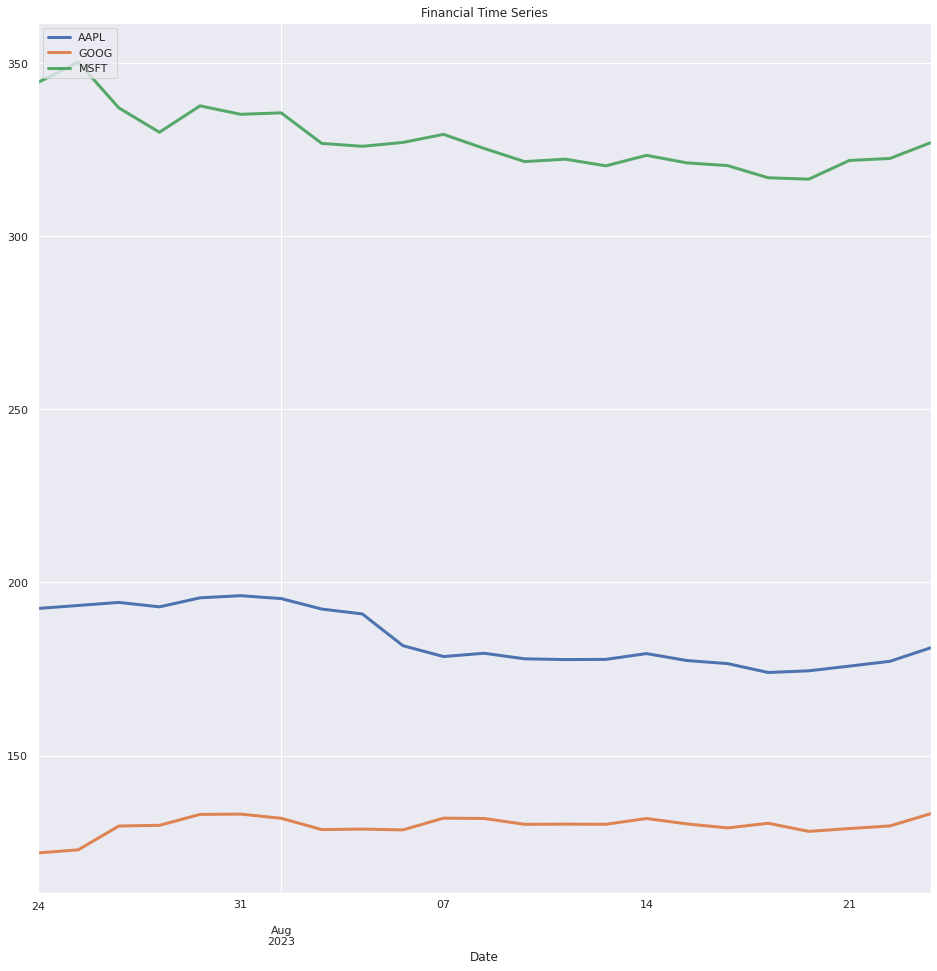

In [227]:
# Generate Plots #
#----------------#
DF_Stock.plot(figsize=(16,16),linewidth=3)

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Financial Time Series")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./Plots/Lesson_3/Financial_TimeSeries.pdf', format='pdf')
# Show Plot
if 'generate_plots' in globals():
    plt.show(block=False)

## Visualizing the Simulation of Pi from Lesson 2
Let's conclude today's lesson by visualizing the simulated estimation of $\pi$ form lesson $2$.

---

Let's write a function which samples the cube $[-1,1]^2$ and colours a point as blue if it lies in the unit circle, i.e. if $x^2+y^2=1$, and red otherwise.  

In [25]:
# Import Packages
import random

# Define Said Function
def monte_carlo_pi_visualization(num_samples):
    inside_circle = 0
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []
    
    for _ in range(num_samples):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        
        distance = x**2 + y**2
        
        if distance <= 1:
            inside_circle += 1
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)
    
    pi_estimate = (inside_circle / num_samples) * 4
    
    # Initialize Plot #
    #-----------------#
    plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k') # Figure Dimensions
    # Generate Scatter Plot
    plt.scatter(inside_x, inside_y, color='blue', marker='.', label='Points Inside Circle')
    plt.scatter(outside_x, outside_y, color='red', marker='.', label='Points Outside Circle')
    plt.title(f"Monte Carlo Estimation of π\nEstimated Value:{pi_estimate:.6f}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Export #
    #--------#
    # Show Plot
    plt.show(block=False)

Deploy the Function

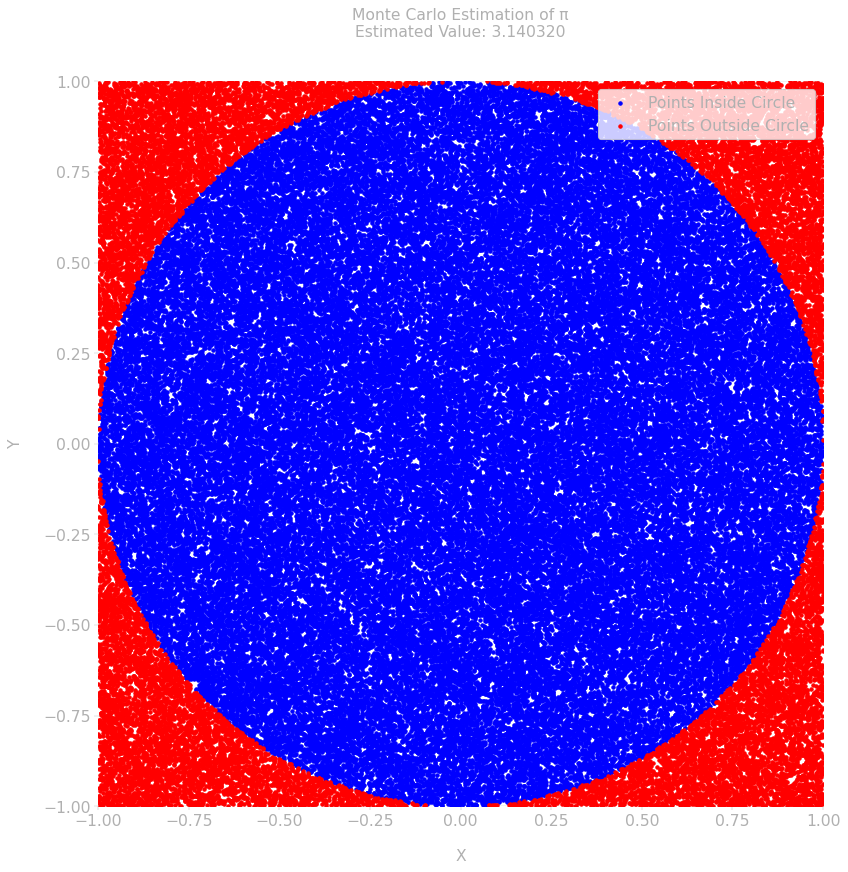

In [27]:
# Number of samples for the simulation
N_Samples = 10**5

# Generate visualization of Monte Carlo estimation
monte_carlo_pi_visualization(N_Samples)

---
# Fin
---